#### Architecture - Semantic Search using Elastic Search


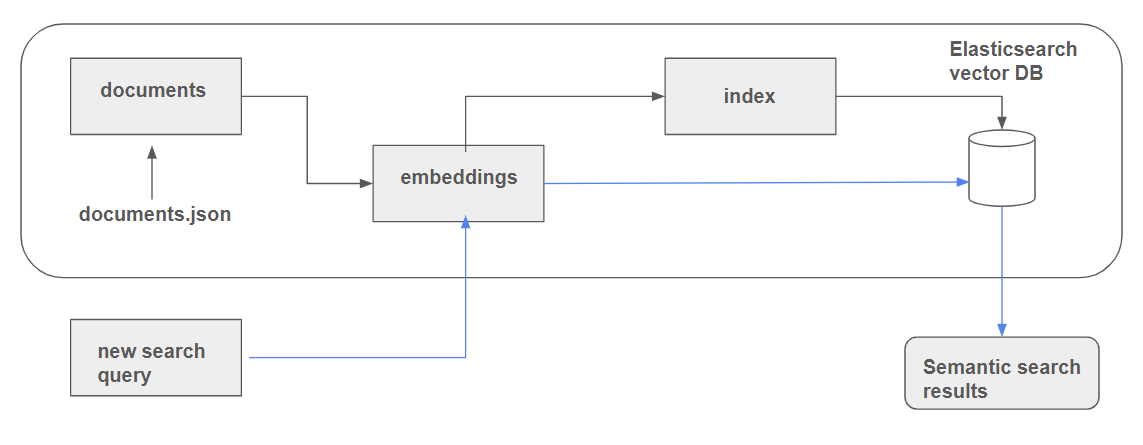

* Two very important concepts in Elasticsearch are documents and indexes.

* A document is collection of fields with their associated values. 

* To work with Elasticsearch you have to organize your data into documents, and then add all your documents to an index. 

* Index as a collection of documents that is stored in a highly optimized format designed to perform efficient searches.

#### Step 1: Prepare documents

In [1]:
import json

json_file_path = '/home/tinchung/Documents/GitHub/End-to-end-law-searching-with-RAG-Mamba/Law_corpus/law-corpus.json'

with open(json_file_path, 'rt') as f_in:
    docs_raw = json.load(f_in)
# docs_raw = [docs_raw]
docs_raw

{'Luật Giáo Dục': {'law_title': 'Luật Giáo Dục',
  'law_number': 'Luật số: 43/2019/QH14',
  'chapters': [{'chapter_title': 'Chương I',
    'articles': [{'article_number': 'Điều 1',
      'title': 'Phạm vi điều chỉnh',
      'content': 'Luật này quy định về hệ thống giáo dục quốc dân; cơ sở giáo dục, nhà giáo, người học; quản lý nhà nước về giáo dục; quyền và trách nhiệm của cơ quan, tổ chức, cá nhân liên quan đến hoạt động giáo dục. '},
     {'article_number': 'Điều 2',
      'title': 'Mục tiêu giáo dục',
      'content': 'Mục tiêu giáo dục nhằm phát triển toàn diện con người Việt Nam có đạo đức, tri thức, văn hóa, sức khỏe, thẩm mỹ và nghề nghiệp; có phẩm chất, năng lực và ý thức công dân; có lòng yêu nước, tinh thần dân tộc, trung thành với lý tưởng độc lập dân tộc và chủ nghĩa xã hội; phát huy tiềm năng, khả năng sáng tạo của mỗi cá nhân; nâng cao dân trí, phát triển nguồn nhân lực, bồi dưỡng nhân tài, đáp ứng yêu cầu của sự nghiệp xây dựng, bảo vệ Tổ quốc và hội nhập quốc tế. '},
 

In [2]:
documents = []

for law_title, law_data in docs_raw.items():
    law_title = law_data.get("law_title")
    law_number = law_data.get("law_number")
    chapters = law_data.get("chapters", [])
    
    for chapter in chapters:
        chapter_title = chapter.get("chapter_title")
        articles = chapter.get("articles", [])
        
        for article in articles:
            doc = {
                "law_title": law_title,
                "law_number": law_number,
                "chapter_title": chapter_title,
                "article_number": article.get("article_number"),
                "title": article.get("title"),
                "content": article.get("content")
            }
            documents.append(doc)
print(len(documents))
documents[0]


314


{'law_title': 'Luật Giáo Dục',
 'law_number': 'Luật số: 43/2019/QH14',
 'chapter_title': 'Chương I',
 'article_number': 'Điều 1',
 'title': 'Phạm vi điều chỉnh',
 'content': 'Luật này quy định về hệ thống giáo dục quốc dân; cơ sở giáo dục, nhà giáo, người học; quản lý nhà nước về giáo dục; quyền và trách nhiệm của cơ quan, tổ chức, cá nhân liên quan đến hoạt động giáo dục. '}

In [3]:
documents[-1]

{'law_title': 'Luật Giao Thông Đường Bộ',
 'law_number': 'Luật số: 23/2008/QH12',
 'chapter_title': 'CHƯƠNG VIII',
 'article_number': 'Điều 89',
 'title': 'Quy định chi tiết và hướng dẫn thi hành',
 'content': 'Chính phủ và cơ quan có thẩm quyền quy định chi tiết và hướng dẫn thi hành các điều, khoản được giao trong Luật; hướng dẫn những nội dung cần thiết khác của Luật này để đáp ứng yêu cầu quản lý nhà nước. Luật này đã được Quốc hội nước Cộng hòa xã hội chủ nghĩa Việt Nam khóa XII, kỳ họp thứ 4 thông qua ngày 13 tháng 11 năm 2008. CHỦ TỊCH QUỐC HỘI Nguyễn Phú Trọng '}

In [4]:
import json

json_file_path = '/home/tinchung/Documents/GitHub/End-to-end-law-searching-with-RAG-Mamba/Law_corpus/law-corpus.json'

with open(json_file_path, 'r', encoding='utf-8') as f_in:
    data = json.load(f_in)

documents = []

for law_title, law_data in data.items():
    law_title = law_data.get("law_title")
    law_number = law_data.get("law_number")
    chapters = law_data.get("chapters", [])
    
    for chapter in chapters:
        chapter_title = chapter.get("chapter_title")
        articles = chapter.get("articles", [])
        
        for article in articles:
            doc = {
                "law_title": law_title,
                "law_number": law_number,
                "chapter_title": chapter_title,
                "article_number": article.get("article_number"),
                "title": article.get("title"),
                "content": article.get("content")
            }
            documents.append(doc)

# Now 'documents' contains a list of dictionaries, each representing an article
# with inferred 'law_title' and 'law_number'


print(len(documents))
documents[0]

314


{'law_title': 'Luật Giáo Dục',
 'law_number': 'Luật số: 43/2019/QH14',
 'chapter_title': 'Chương I',
 'article_number': 'Điều 1',
 'title': 'Phạm vi điều chỉnh',
 'content': 'Luật này quy định về hệ thống giáo dục quốc dân; cơ sở giáo dục, nhà giáo, người học; quản lý nhà nước về giáo dục; quyền và trách nhiệm của cơ quan, tổ chức, cá nhân liên quan đến hoạt động giáo dục. '}

In [5]:
documents[-1]

{'law_title': 'Luật Giao Thông Đường Bộ',
 'law_number': 'Luật số: 23/2008/QH12',
 'chapter_title': 'CHƯƠNG VIII',
 'article_number': 'Điều 89',
 'title': 'Quy định chi tiết và hướng dẫn thi hành',
 'content': 'Chính phủ và cơ quan có thẩm quyền quy định chi tiết và hướng dẫn thi hành các điều, khoản được giao trong Luật; hướng dẫn những nội dung cần thiết khác của Luật này để đáp ứng yêu cầu quản lý nhà nước. Luật này đã được Quốc hội nước Cộng hòa xã hội chủ nghĩa Việt Nam khóa XII, kỳ họp thứ 4 thông qua ngày 13 tháng 11 năm 2008. CHỦ TỊCH QUỐC HỘI Nguyễn Phú Trọng '}

#### Step 2: Create Embeddings using Pretrained Models

Sentence Transformers documentation here: https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

In [6]:

from sentence_transformers import SentenceTransformer
import torch
import torch.nn.functional as F

/home/tinchung/Documents/GitHub/End-to-end-law-searching-with-RAG-Mamba/temp_evn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
model = SentenceTransformer("truro7/vn-law-embedding", truncate_dim = 128) #truncate_dim = 768 

Invalid model-index. Not loading eval results into CardData.
Invalid model-index. Not loading eval results into CardData.


In [8]:

query = "Trộm cắp sẽ bị xử lý như thế nào?" 

corpus = """

[100_2015_QH13]

LUẬT HÌNH SỰ
Điều 173. Tội trộm cắp tài sản

Khoản 1:

1. Người nào trộm cắp tài sản của người khác trị giá từ 2.000.000 đồng đến dưới 50.000.000 đồng hoặc dưới 2.000.000 đồng nhưng thuộc một trong các trường hợp sau đây, thì bị phạt cải tạo không giam giữ đến 03 năm hoặc phạt tù từ 06 tháng đến 03 năm:
a) Đã bị xử phạt vi phạm hành chính về hành vi chiếm đoạt tài sản mà còn vi phạm;
b) Đã bị kết án về tội này hoặc về một trong các tội quy định tại các điều 168, 169, 170, 171, 172, 174, 175 và 290 của Bộ luật này, chưa được xóa án tích mà còn vi phạm;
c) Gây ảnh hưởng xấu đến an ninh, trật tự, an toàn xã hội;
d) Tài sản là phương tiện kiếm sống chính của người bị hại và gia đình họ; tài sản là kỷ vật, di vật, đồ thờ cúng có giá trị đặc biệt về mặt tinh thần đối với người bị hại.
    
"""

# Encode the query and corpus directly
query_embedding = model.encode(query, convert_to_tensor=True)  # Encode and get tensor directly
corpus_embedding = model.encode(corpus, convert_to_tensor=True) # Encode and get tensor directly

# Ensure embeddings are on the same device (CPU or GPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
query_embedding = query_embedding.to(device)
corpus_embedding = corpus_embedding.to(device)

# Calculate cosine similarity
cosine_similarity = F.cosine_similarity(query_embedding.unsqueeze(0), corpus_embedding.unsqueeze(0))

print(cosine_similarity.item())

0.8144615888595581


In [9]:
embedding = torch.tensor([model.encode('đây là 1 câu nói bằng tiếng Việt')])
print(len(model.encode('đây là 1 câu nói bằng tiếng Việt')))
embedding
#UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1716905979055/work/torch/csrc/utils/tensor_new.cpp:274.)
#   embedding = torch.tensor([model.encode('đây là 1 câu nói bằng tiếng Việt')])

128


/tmp/ipykernel_5748/1321822962.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  embedding = torch.tensor([model.encode('đây là 1 câu nói bằng tiếng Việt')])


tensor([[-0.0328,  0.0029,  0.0411, -0.0379,  0.0470, -0.0664,  0.0508,  0.0177,
          0.1170,  0.0322,  0.0240, -0.0198,  0.1468, -0.0189, -0.0433, -0.0246,
         -0.0528,  0.0731, -0.0200, -0.0338, -0.0037,  0.0350, -0.0684,  0.0362,
          0.0188, -0.0146,  0.0697, -0.0692,  0.0510, -0.0020, -0.0097, -0.0776,
         -0.0435,  0.0684, -0.0079, -0.0410,  0.0217, -0.0869,  0.0702,  0.0016,
          0.0065,  0.0771,  0.0112, -0.0604,  0.0482,  0.0646,  0.0524, -0.0662,
         -0.0163, -0.0448,  0.0318, -0.0547,  0.0117,  0.0048, -0.0228,  0.0053,
         -0.0788,  0.0202,  0.0032, -0.0272,  0.0059, -0.0377,  0.0049,  0.0176,
         -0.0685, -0.0181,  0.0094, -0.0158, -0.0358,  0.0174,  0.0345,  0.0363,
         -0.1184, -0.0211, -0.0544,  0.0003,  0.0369,  0.0149, -0.0287, -0.0809,
          0.0014,  0.0168,  0.0678, -0.0203, -0.0183, -0.0072, -0.0496,  0.0267,
         -0.0332,  0.0039, -0.0221, -0.0274,  0.0482,  0.0117, -0.0241, -0.0772,
         -0.0250, -0.0090, -

actual data fields (like title and content) and categorical fields (like law_title, law_number, and chapter_title). The law_title, law_number, and chapter_title fields serve as categorical data, while title and content hold the main information.

```
{
  "law_title": "Luật Giáo Dục",               // Categorical field
  "law_number": "43/2019/QH14",               // Categorical field
  "chapter_title": "Chương I",                // Categorical field
  "article_number": "2",                      // Identifier, can also be categorical
  "title": "Mục tiêu giáo dục",               // Actual data field (Title of the article)
  "content": "Mục tiêu giáo dục nhằm phát triển toàn diện con người Việt Nam có đạo đức, tri thức, văn hóa, sức khỏe, thẩm mỹ và nghề nghiệp; có phẩm chất, năng lực và ý thức công dân; có lòng yêu nước, tinh thần dân tộc, trung thành với lý tưởng độc lập dân tộc và chủ nghĩa xã hội; phát huy tiềm năng, khả năng sáng tạo của mỗi cá nhân; nâng cao dân trí, phát triển nguồn nhân lực, bồi dưỡng nhân tài, đáp ứng yêu cầu của sự nghiệp xây dựng, bảo vệ Tổ quốc và hội nhập quốc tế."  // Main content field
}

```

In [10]:
#created the dense vector using the pre-trained model
operations = []
for doc in documents:
    # Transforming the title into an embedding using the model
    doc["title_vector"] = model.encode(doc["title"]).tolist()  # Using `title` field for embeddings
    operations.append(doc)

#only took 1 second to embedding?

In [11]:
operations[0]

{'law_title': 'Luật Giáo Dục',
 'law_number': 'Luật số: 43/2019/QH14',
 'chapter_title': 'Chương I',
 'article_number': 'Điều 1',
 'title': 'Phạm vi điều chỉnh',
 'content': 'Luật này quy định về hệ thống giáo dục quốc dân; cơ sở giáo dục, nhà giáo, người học; quản lý nhà nước về giáo dục; quyền và trách nhiệm của cơ quan, tổ chức, cá nhân liên quan đến hoạt động giáo dục. ',
 'title_vector': [-0.016719507053494453,
  -0.010627620853483677,
  -0.026309775188565254,
  0.044357333332300186,
  -0.03547489643096924,
  -0.055858854204416275,
  -0.0377771258354187,
  0.02678067609667778,
  0.0474679209291935,
  0.012107581831514835,
  -0.011871769092977047,
  0.02700604312121868,
  0.0291838888078928,
  -0.014476709999144077,
  -0.003189267124980688,
  -0.04286668822169304,
  0.046308115124702454,
  0.06554429978132248,
  0.00877337995916605,
  0.025538532063364983,
  -0.020018428564071655,
  0.025404013693332672,
  0.03681264445185661,
  0.03704510256648064,
  0.08424399048089981,
  -0.0095

In [12]:
print(len(operations))
operations[-1]

314


{'law_title': 'Luật Giao Thông Đường Bộ',
 'law_number': 'Luật số: 23/2008/QH12',
 'chapter_title': 'CHƯƠNG VIII',
 'article_number': 'Điều 89',
 'title': 'Quy định chi tiết và hướng dẫn thi hành',
 'content': 'Chính phủ và cơ quan có thẩm quyền quy định chi tiết và hướng dẫn thi hành các điều, khoản được giao trong Luật; hướng dẫn những nội dung cần thiết khác của Luật này để đáp ứng yêu cầu quản lý nhà nước. Luật này đã được Quốc hội nước Cộng hòa xã hội chủ nghĩa Việt Nam khóa XII, kỳ họp thứ 4 thông qua ngày 13 tháng 11 năm 2008. CHỦ TỊCH QUỐC HỘI Nguyễn Phú Trọng ',
 'title_vector': [-0.00079920090502128,
  0.005177717190235853,
  0.010067745111882687,
  0.042553018778562546,
  -0.07466480880975723,
  -0.014697341248393059,
  0.0007895438466221094,
  -0.03565432131290436,
  -0.015464013442397118,
  -0.014952360652387142,
  -0.03372470289468765,
  -0.0009687239653430879,
  -0.04361038655042648,
  0.016420070081949234,
  -0.00893867015838623,
  0.013167071156203747,
  -0.05954848974

#### Step 3: Setup ElasticSearch connection 

Run
```
docker run -it \
    --name elasticsearch \
    -p 9200:9200 \
    -p 9300:9300 \
    -e "discovery.type=single-node" \
    -e "xpack.security.enabled=false" \
    elasticsearch:8.4.3
```
or 

`docker compose up`

In [4]:
from elasticsearch import Elasticsearch
es_client = Elasticsearch('http://localhost:9200') 

es_client.info()

ObjectApiResponse({'name': 'f5b0ce25f22d', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'b--w11TCScGcQS_ss4dHfg', 'version': {'number': '8.4.3', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73', 'build_date': '2022-10-04T07:17:24.662462378Z', 'build_snapshot': False, 'lucene_version': '9.3.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

#### Step 4: Create Mappings and Index

* Mapping is the process of defining how a document, and the fields it contains, are stored and indexed.

* Each document is a collection of fields, which each have their own data type.

* We can compare mapping to a database schema in how it describes the fields and properties that documents hold, the datatype of each field (e.g., string, integer, or date), and how those fields should be indexed and stored 



In [1]:
index_settings = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "law_title": {"type": "keyword"},                
            "law_number": {"type": "keyword"},               
            "chapter_title": {"type": "keyword"},            
            "article_number": {"type": "keyword"},            
            "title": {"type": "text"},                        
            "content": {"type": "text"},   
            "id": {"type": "text"},
        }
    }

}


In [15]:
index_name = "legal_documents"

# Delete index (with increased timeout using .options())
es_client.options(request_timeout=60).indices.delete(index=index_name, ignore_unavailable=True)

# Create index (with increased timeout using .options())
es_client.options(request_timeout=60).indices.create(index=index_name, body=index_settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'legal_documents'})

#### Step 5: Add documents into index

In [16]:
for doc in operations:
    try:
        es_client.options(request_timeout=60).index(index=index_name, document=doc)
    except Exception as e:
        print(e)

#### Step 6: Create end user query

In [17]:
search_term = "hướng dẫn thi hành"
vector_search_term = model.encode(search_term)

In [18]:
query = {
    "field": "title_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000, 
}

In [19]:
res = es_client.search(index=index_name, knn=query, source=["text", "section", "question", "course"])
res["hits"]["hits"]

[{'_index': 'legal_documents',
  '_id': 'BQb12ZMBJLnveH4S80cL',
  '_score': 0.93897474,
  '_source': {}},
 {'_index': 'legal_documents',
  '_id': 'hwb12ZMBJLnveH4S70aK',
  '_score': 0.83958924,
  '_source': {}},
 {'_index': 'legal_documents',
  '_id': 'BAb12ZMBJLnveH4S80cF',
  '_score': 0.83958924,
  '_source': {}},
 {'_index': 'legal_documents',
  '_id': 'iAb12ZMBJLnveH4S70aR',
  '_score': 0.6756631,
  '_source': {}},
 {'_index': 'legal_documents',
  '_id': 'Dwb12ZMBJLnveH4S80dG',
  '_score': 0.6688702,
  '_source': {}}]

#### Step 7: Perform Keyword search with Semantic Search (Hybrid/Advanced Search)

explored creating a vector database using Elasticsearch and implemented both basic and advanced search functionalities. However, upon reflection, it became evident that our advanced search was not truly semantic but rather a keyword-based search. This distinction arises because directly using user input in the search function results in keyword matching. For Elasticsearch to perform genuine semantic search, user input must first be transformed into vector embeddings, which are then utilized in the search function. This crucial step was overlooked in our earlier implementation. In this session, we will correct this by implementing an advanced semantic search that properly converts user input into vector embeddings before conducting the search.

In [ ]:
# Note: I made a minor modification to the query shown in the notebook here
# (compare to the one shown in the video)
# Included "knn" in the search query (to perform a semantic search) along with the filter  
knn_query = {
    "field": "title_vector",
    "query_vector": vector_search_term,
    "k": 5, 
    "num_candidates": 10000
}

In [21]:
response = es_client.search(
    index=index_name,
    query={
        "match": {"section": "General course-related questions"},
    },
    knn=knn_query,
    size=5
)

In [22]:
response["hits"]["hits"]

[{'_index': 'legal_documents',
  '_id': 'BQb12ZMBJLnveH4S80cL',
  '_score': 0.93897474,
  '_source': {'law_title': 'Luật Hôn Nhân Và Gia Đình',
   'law_number': 'Số: 52/2014/QH13',
   'chapter_title': 'Chương IX',
   'article_number': 'Điều 133',
   'title': 'Quy định chi tiết và hướng dẫn thi hành',
   'content': 'Chính phủ quy định chi tiết các điều, khoản được giao trong Luật. Tòa án nhân dân tối cao chủ trì phối hợp với Viện kiểm sát nhân dân tối cao và Bộ Tư pháp hướng dẫn thi hành các điều, khoản được giao trong Luật. Luật này đã được Quốc hội nước Cộng hòa xã hội chủ nghĩa Việt Nam khóa XIII, kỳ họp thứ 7 thông qua ngày 19 tháng 6 năm 2014. CHỦ TỊCH QUỐC HỘI Nguyễn Sinh Hùng ',
   'title_vector': [-0.00079920090502128,
    0.005177717190235853,
    0.010067745111882687,
    0.042553018778562546,
    -0.07466480880975723,
    -0.014697341248393059,
    0.0007895438466221094,
    -0.03565432131290436,
    -0.015464013442397118,
    -0.014952360652387142,
    -0.03372470289468765,


#### References

1. https://logz.io/blog/elasticsearch-mapping/#:~:text=Within%20a%20search%20engine%2C%20mapping,indexes%20and%20stores%20its%20fields

2. https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

3. https://www.elastic.co/search-labs/tutorials

4. https://www.elastic.co/search-labs/blog/text-similarity-search-with-vectors-in-elasticsearch